# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1



# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    city_weather = requests.get(city_url).json()
    
 # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | trinity beach
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | suances
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | nandigama
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | howard springs
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | weno
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | bereznehuvate
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 18 of Set 1 | umba
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | gobabis
Processing 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
                            
# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,6.64,61,75,11.50,SJ,1710191320
1,trinity beach,-16.7888,145.6968,78.01,93,75,4.61,AU,1710191320
2,stanley,54.8680,-1.6985,41.13,97,100,0.00,GB,1710191208
3,suances,43.4334,-4.0434,53.98,98,75,4.61,ES,1710191320
4,college,64.8569,-147.8028,3.15,60,75,5.75,US,1710191320


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,6.64,61,75,11.50,SJ,1710191320
1,trinity beach,-16.7888,145.6968,78.01,93,75,4.61,AU,1710191320
2,stanley,54.8680,-1.6985,41.13,97,100,0.00,GB,1710191208
3,suances,43.4334,-4.0434,53.98,98,75,4.61,ES,1710191320
4,college,64.8569,-147.8028,3.15,60,75,5.75,US,1710191320


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

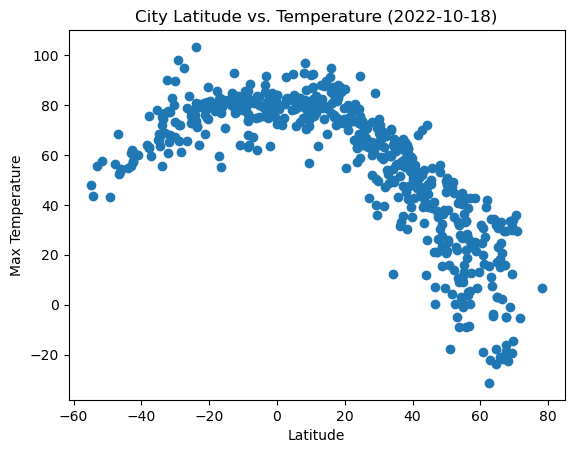

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis_df1 = city_data_df["Lat"]
y_axis_df1 = city_data_df["Max Temp"]
plt.scatter(x_axis_df1, y_axis_df1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Temperature (2022-10-18)')
# YOUR CODE HERE
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

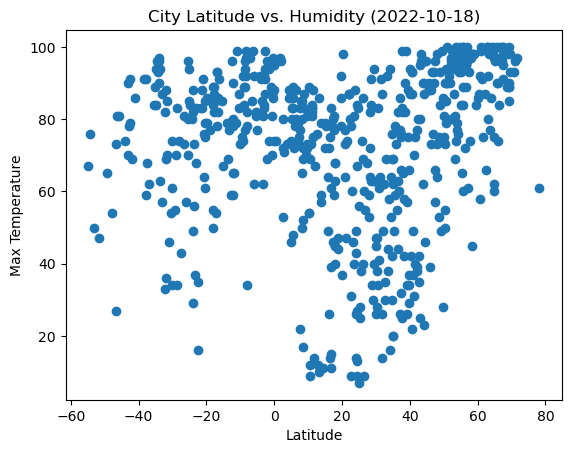

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_axis_df2 = city_data_df["Lat"]
y_axis_df2 = city_data_df["Humidity"]
plt.scatter(x_axis_df2, y_axis_df2)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Humidity (2022-10-18)')
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

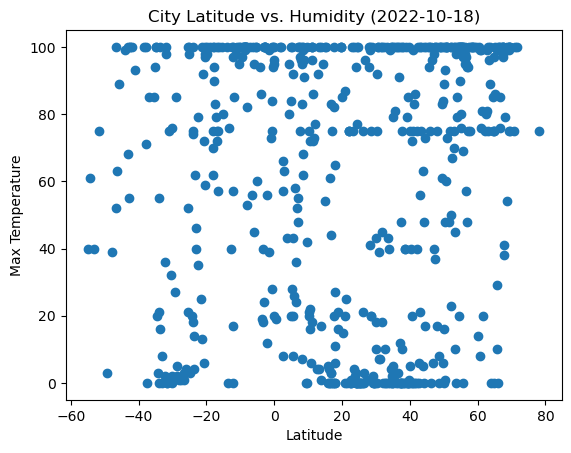

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_axis_df3 = city_data_df["Lat"]
y_axis_df3 = city_data_df["Cloudiness"]
plt.scatter(x_axis_df3, y_axis_df3)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Humidity (2022-10-18)')
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

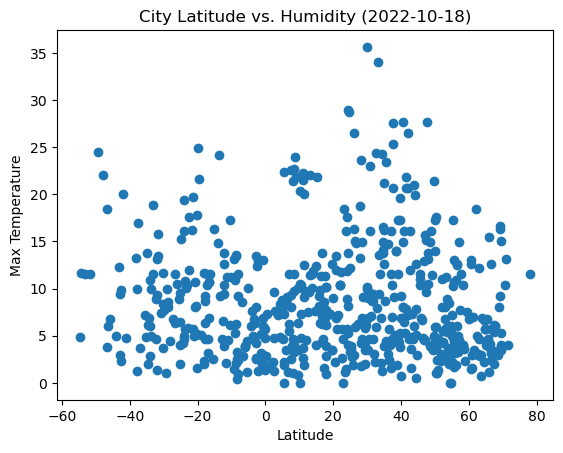

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_axis_df4 = city_data_df["Lat"]
y_axis_df4 = city_data_df["Wind Speed"]
plt.scatter(x_axis_df4, y_axis_df4)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Humidity (2022-10-18)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy import stats



In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
north_df = pd.DataFrame(city_data)

northern_hemi_df = north_df[north_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,6.64,61,75,11.50,SJ,1710191320
2,stanley,54.8680,-1.6985,41.13,97,100,0.00,GB,1710191208
3,suances,43.4334,-4.0434,53.98,98,75,4.61,ES,1710191320
4,college,64.8569,-147.8028,3.15,60,75,5.75,US,1710191320
5,aasiaat,68.7098,-52.8699,-1.07,98,54,2.91,GL,1710191320


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
south_df = pd.DataFrame(city_data)

southern_hemi_df = south_df[south_df['Lat'] <=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,trinity beach,-16.7888,145.6968,78.01,93,75,4.61,AU,1710191320
6,avarua,-21.2078,-159.7750,76.01,88,100,19.71,CK,1710191321
8,bengkulu,-3.8004,102.2655,75.58,91,86,7.65,ID,1710191321
9,howard springs,-12.4970,131.0470,76.91,96,100,6.58,AU,1710191321
10,waitangi,-43.9535,-176.5597,54.82,74,99,5.01,NZ,1710191321


###  Temperature vs. Latitude Linear Regression Plot

In [4]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_axis_df5 = northern_hemi_df["Lat"]
y_axis_df5 = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df5, y_axis_df5)

regress_values = x_axis_df5 * slope + intercept

line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot with the regression line
plt.scatter(x_axis_df5, y_axis_df5, label="Data Points")
plt.plot(x_axis_df5, regress_values, "r-", label="Regression Line")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_equation, (0, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.legend()
plt.savefig("../output_data/North-Temp-lat.png")

plt.show()

NameError: name 'northern_hemi_df' is not defined

In [3]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_axis_df6 = southern_hemi_df["Lat"]
y_axis_df6 = southern_hemi_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df6, y_axis_df6)

#### i addedd these commeents Get regression values
regress_values = x_axis_df6 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# i addedd these commeents Create Plot
plt.scatter(x_axis_df6,y_axis_df6, label="Data Points")
plt.plot(x_axis_df6,regress_values,"r-", label="Regression Line")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1453456408120745


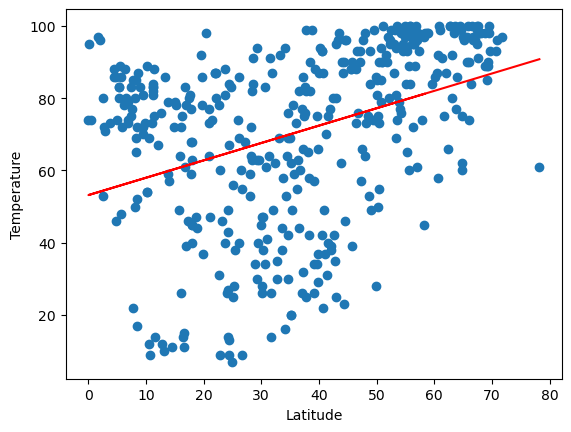

In [39]:
# Northern Hemisphere
# YOUR CODE HERE

x_axis_df7 = northern_hemi_df["Lat"]
y_axis_df7 = northern_hemi_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df7, y_axis_df7)

#### i addedd these commeents Get regression values
regress_values = x_axis_df7 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# i addedd these commeents Create Plot
plt.scatter(x_axis_df7,y_axis_df7)
plt.plot(x_axis_df7,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.09408150579881142


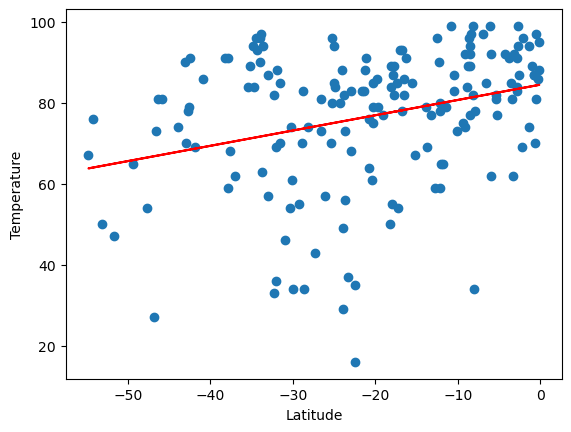

In [40]:
# Southern Hemisphere
# YOUR CODE HERE

x_axis_df8 = southern_hemi_df["Lat"]
y_axis_df8 = southern_hemi_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df8, y_axis_df8)

#### i addedd these commeents Get regression values
regress_values = x_axis_df8 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# i addedd these commeents Create Plot
plt.scatter(x_axis_df8,y_axis_df8)
plt.plot(x_axis_df8,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0642384469251959


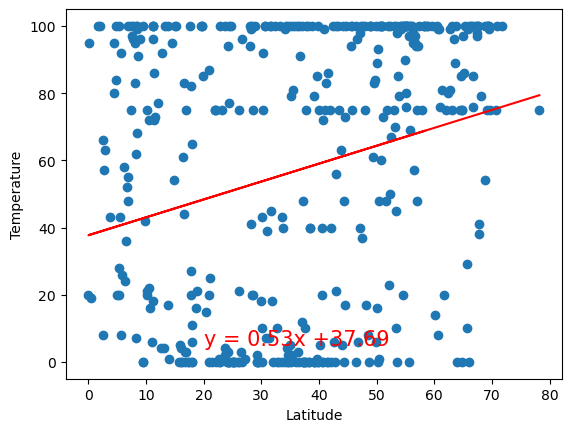

In [48]:
# Northern Hemisphere
# YOUR CODE HERE

x_axis_df9 = northern_hemi_df["Lat"]
y_axis_df9 = northern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df9, y_axis_df9)

#### i addedd these commeents Get regression values
regress_values = x_axis_df9 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# i addedd these commeents Create Plot
plt.scatter(x_axis_df9,y_axis_df9)

plt.plot(x_axis_df9,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


y = 0.71x +80.91
The r-value is: 0.0715411951919543


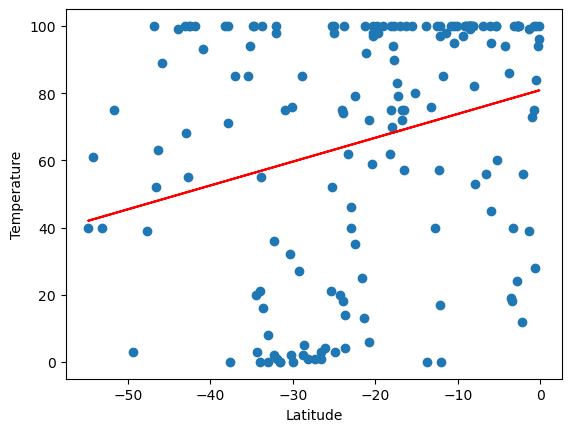

In [50]:
# Southern Hemisphere
# YOUR CODE HERE
x_axis_df10 = southern_hemi_df["Lat"]
y_axis_df10 = southern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df10,y_axis_df10)

#### i addedd these commeents Get regression values
regress_values = x_axis_df10 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# i addedd these commeents Create Plot
plt.scatter(x_axis_df10,y_axis_df10)
plt.plot(x_axis_df10,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011814528880465847


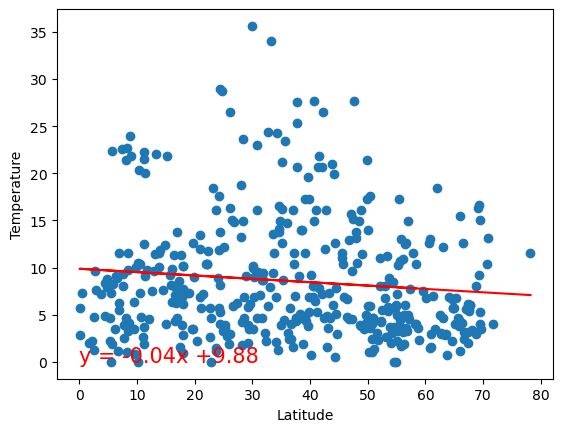

In [51]:
# Northern Hemisphere
# YOUR CODE HERE

x_axis_df11 = northern_hemi_df["Lat"]
y_axis_df11 = northern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df11, y_axis_df11)

#### i addedd these commeents Get regression values
regress_values = x_axis_df11 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# i addedd these commeents Create Plot
plt.scatter(x_axis_df11,y_axis_df11)

plt.plot(x_axis_df11,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


y = -0.09x +6.47
The r-value is: 0.053147399056978725


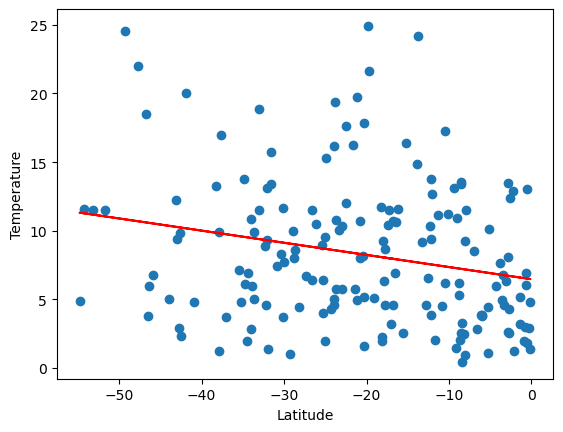

In [53]:
# Southern Hemisphere
# YOUR CODE HERE

x_axis_df12 = southern_hemi_df["Lat"]
y_axis_df12 = southern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df12, y_axis_df12)

#### i addedd these commeents Get regression values
regress_values = x_axis_df12 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# i addedd these commeents Create Plot
plt.scatter(x_axis_df12,y_axis_df12)
plt.plot(x_axis_df12,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE